### PalTaqdeer: AI-Driven Student Success Forecaster
A student Success is a cumination of myriad factors. Take on the challenge of devising an AI mechanism that acnticipates a student's final grade by analyzing an array of inputs: past performance, attendance, hours devoted to studying, and more.

<b>About the dataset:</b>
Student performance dataset: These records are from two Poruguese secondary schools, detailing student grades alongside demographic, social, and scholastic data.

<b>Citation</b>
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

In [ ]:
## Import neccassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


# Metrics
from sklearn import metrics
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

import pickle

#### Step 0: Read the data into pandas DF
- Read the dataset into pandas df
- Explore the dataset info, description and shape etc.

In [ ]:
df = pd.read_csv("student-mat.csv")

In [ ]:
# To see what the data is like
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# this is an example of what the end of the dataset is like
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [ ]:
# print the shape of the df
df.shape

(395, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

- Numerical Summary Statics for the data

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


- Focusing on the target feature:

In [ ]:
df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

Observations on step 0:
- This dataset contains 395 rows.
- It has 33 coulmns.
- Initially there seems to be no missing data from info of the df
- Colomns names are meaningful and indicates their contents.
- It is noticed that we have diffrent types of features, the most of them are dound to be numerical. Others are objects.
- Our target feature has an average of 10.4.
- It is noticed that these features have dominiat ranges: Age, Absences, G1, G2, G3.

#### Step 1: Data Visualization
- General visualization of the features distribution.
- Visualization of the target class which is G3 (final grade).
- Distribution of sex.
- Comparison between mjob and fjob with G3
- Average of final gardes based on schools
- Parents Cohabition Status with respect to average of final grade.

- Let's start with the general visualization

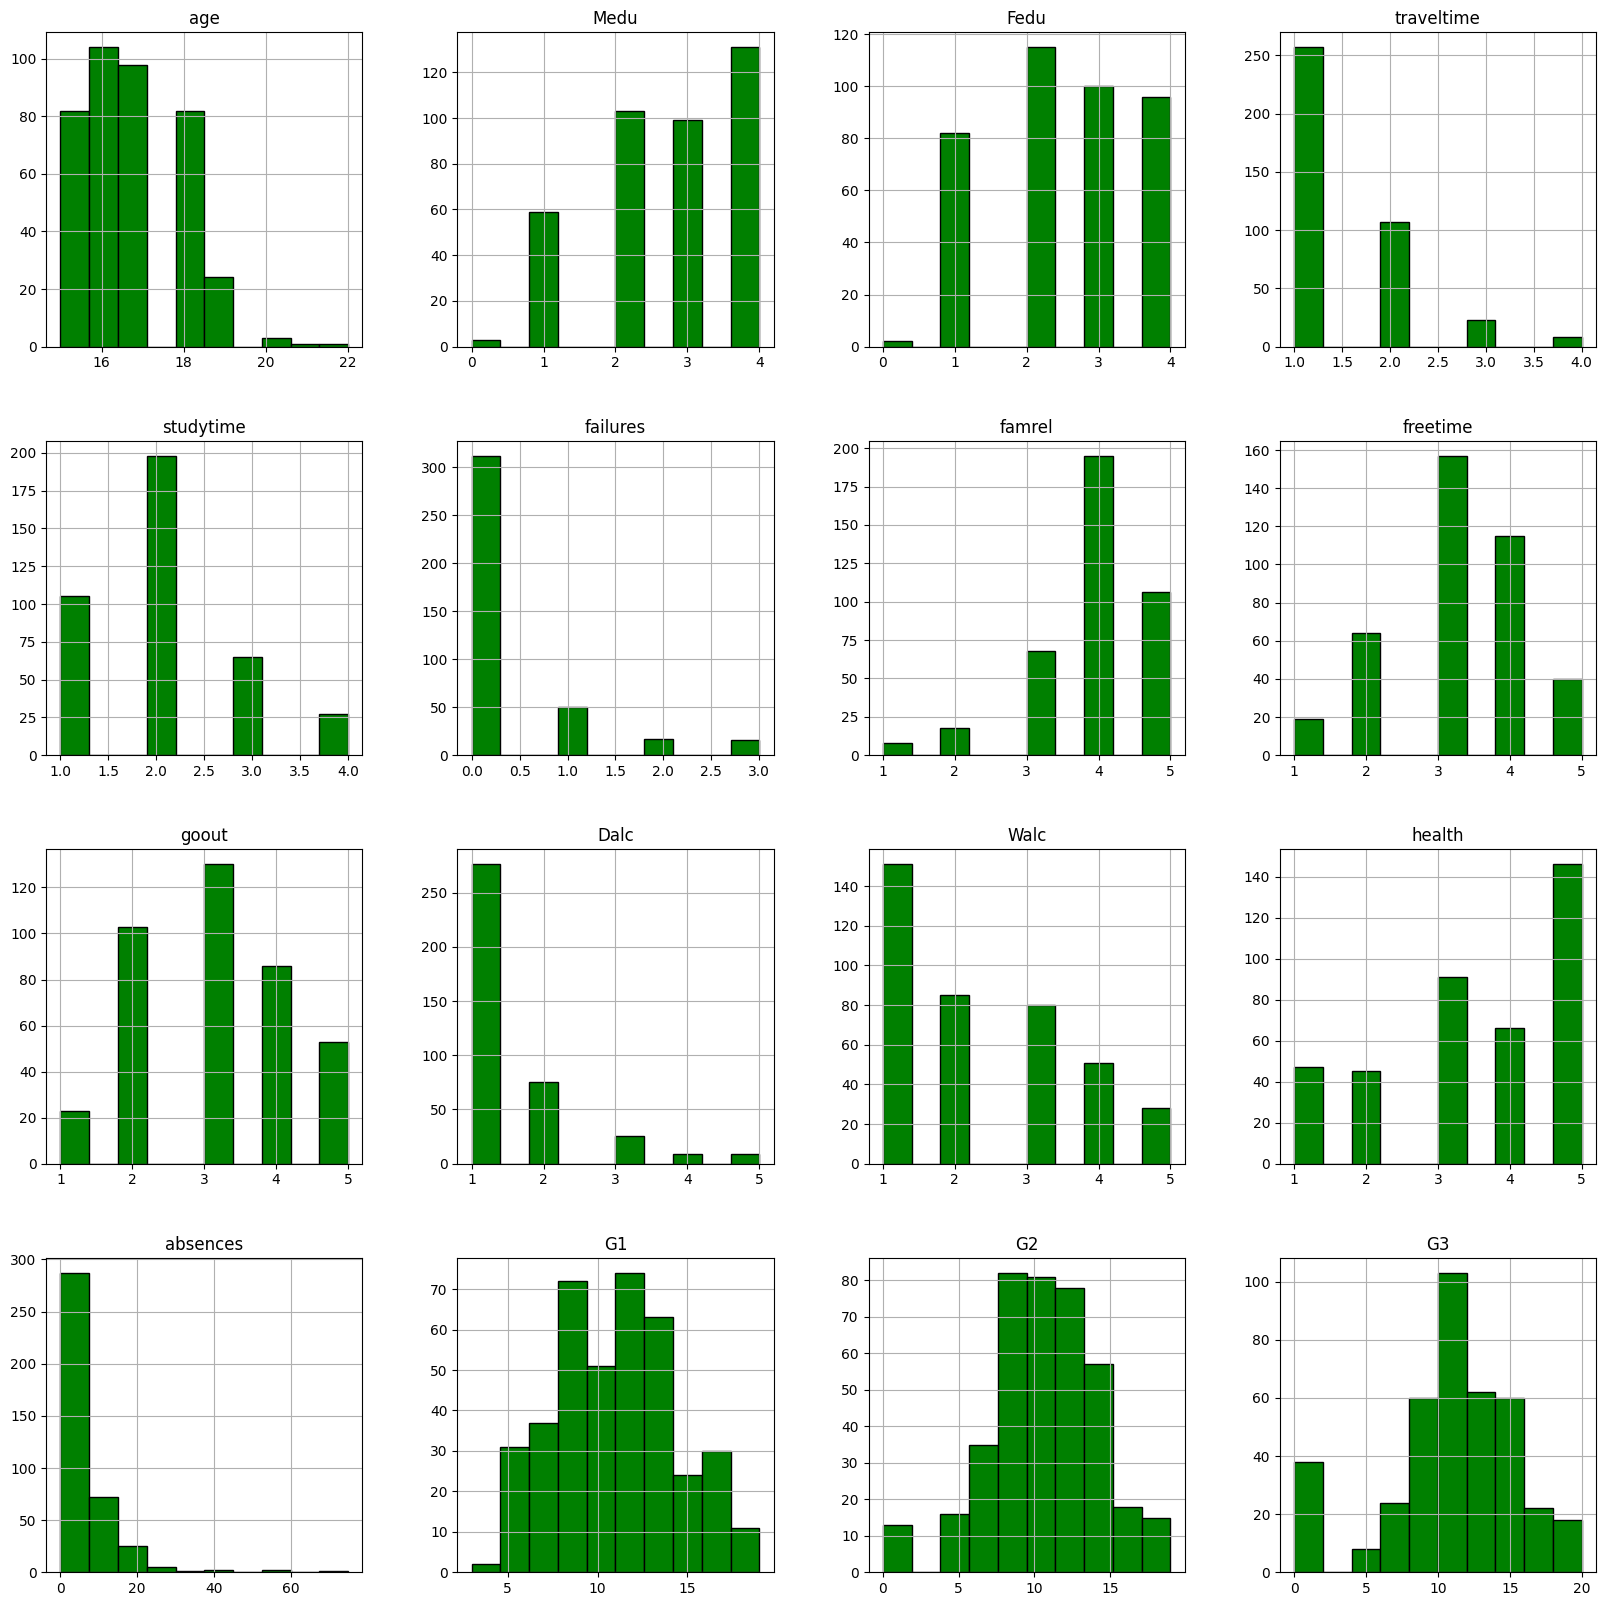

In [ ]:
figure, axes = plt.subplots(figsize=(20, 20))
df.select_dtypes(include='int64').hist(bins =10, ax=axes,color='green', edgecolor='black')
plt.show()

- Now that we have taken a general look, let's take a closer look on the target class G3.

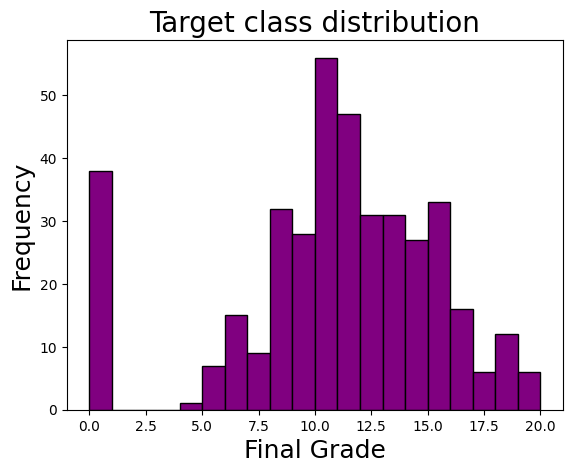

In [ ]:
plt.hist(df['G3'], bins=20, edgecolor='black', color='purple')
plt.xlabel('Final Grade', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.title('Target class distribution', fontsize = 20)
plt.show()

- Let's visualize the Sex feature

In [ ]:
df['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

Text(0.5, 1.0, 'Distribution based on sex')

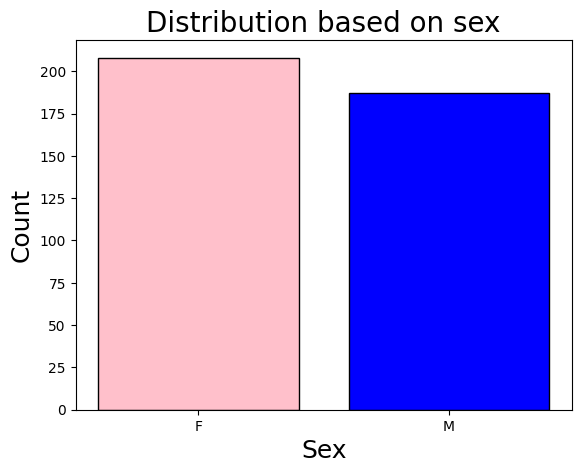

In [ ]:
plt.bar(df['sex'].value_counts().index, df['sex'].value_counts().values, color=['pink','blue'], edgecolor='black')
plt.xlabel('Sex',  fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.title('Distribution based on sex', fontsize = 20)

- Ages of the studnets

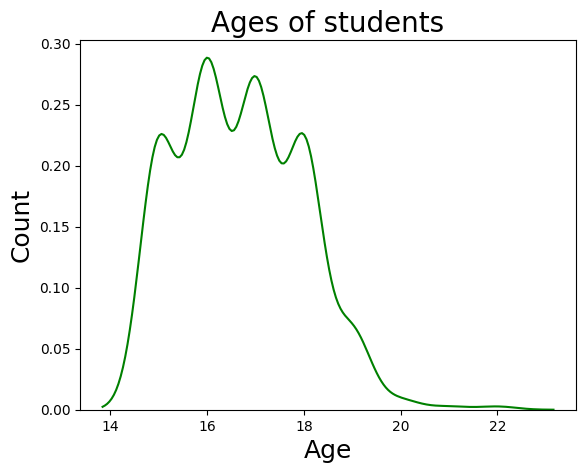

In [ ]:
chart= sns.kdeplot(df['age'], color='green')
chart.axes.set_title('Ages of students', fontsize = 20)
chart.set_xlabel('Age', fontsize = 18)
chart.set_ylabel('Count', fontsize = 18)
plt.show()

- Number of students in diffrent age groups

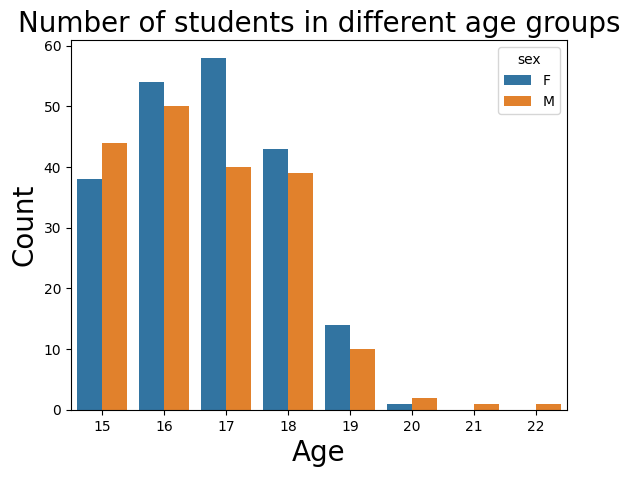

In [ ]:
b = sns.countplot(x=df['age'],hue='sex', data=df)
b.axes.set_title('Number of students in different age groups',fontsize=20)
b.set_xlabel("Age",fontsize=20)
b.set_ylabel("Count",fontsize=20)
plt.show()

- Age in relation of the final grade

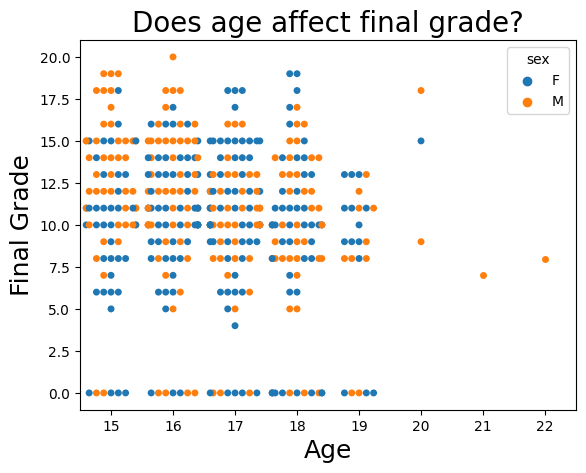

In [ ]:
b = sns.swarmplot(x='age', y='G3',hue='sex', data=df)
b.axes.set_title('Does age affect final grade?', fontsize = 20)
b.set_xlabel('Age', fontsize = 18)
b.set_ylabel('Final Grade', fontsize = 18)
plt.show()

- Distribution based on address

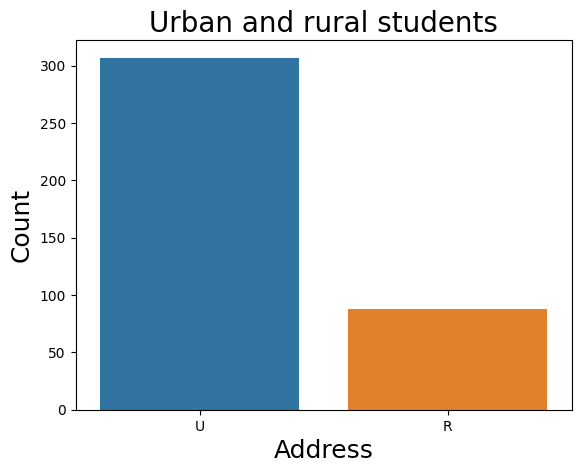

In [ ]:
b = sns.countplot(x=df['address'])
b.axes.set_title('Urban and rural students', fontsize = 20)
b.set_xlabel('Address', fontsize = 18)
b.set_ylabel('Count', fontsize = 18)
plt.show()

- Grades in relation to the student's address

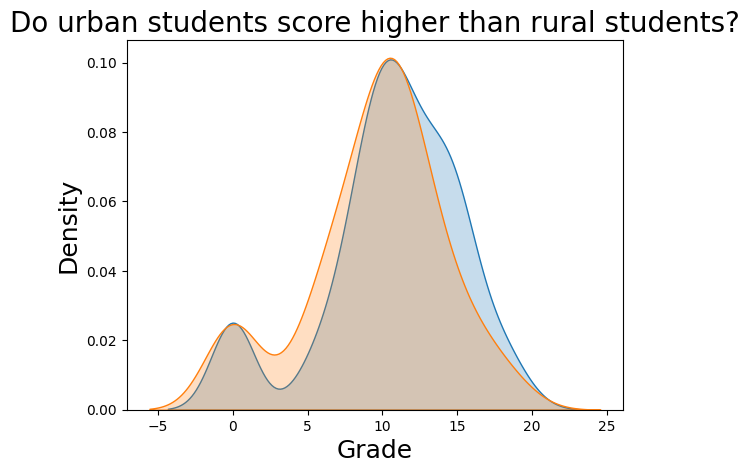

In [ ]:
sns.kdeplot(df.loc[df['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?', fontsize = 20)
plt.xlabel('Grade', fontsize = 18);
plt.ylabel('Density', fontsize = 18)
plt.show()

- The reason of chosing their school in relation to their final grade.

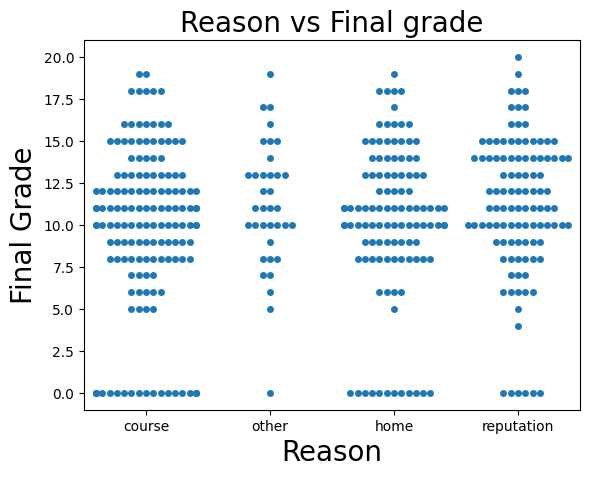

In [ ]:
b = sns.swarmplot(x='reason', y='G3', data=df)
b.axes.set_title('Reason vs Final grade', fontsize = 20)
b.set_xlabel('Reason', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

- Average Final Grades in relation to their Parental Jobs

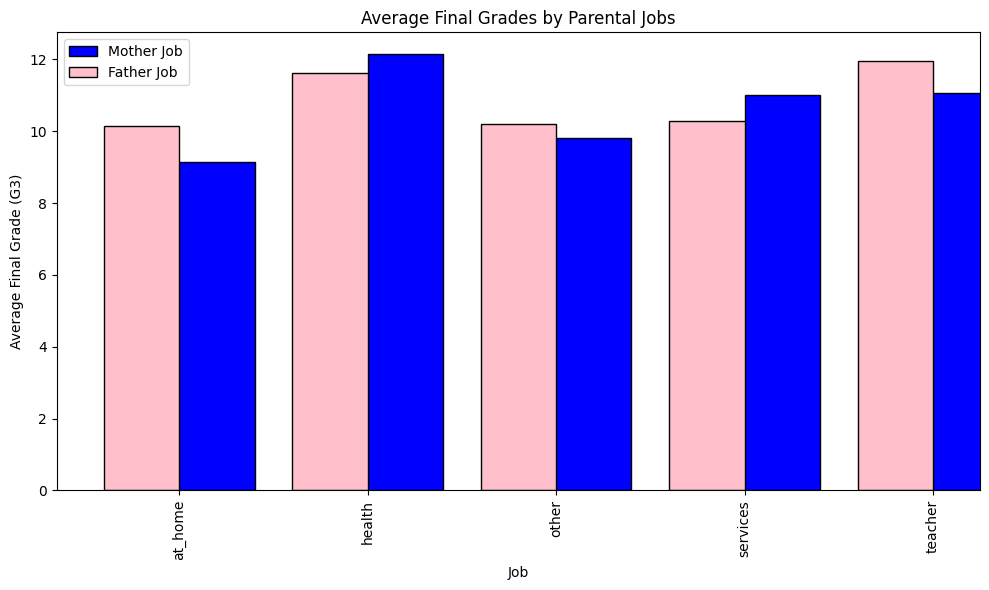

In [ ]:
avg_grades_by_mjob = df.groupby('Mjob')['G3'].mean()
avg_grades_by_fjob = df.groupby('Fjob')['G3'].mean()
fig, ax = plt.subplots(figsize=(10, 6))
avg_grades_by_mjob.plot(kind='bar', ax=ax, color='b', position=0, width=0.4, label='Mother Job', edgecolor='black')
avg_grades_by_fjob.plot(kind='bar', ax=ax, color='pink', position=1, width=0.4, label='Father Job', edgecolor='black')
ax.set_xlabel('Job')
ax.set_ylabel('Average Final Grade (G3)')
ax.set_title('Average Final Grades by Parental Jobs')
ax.legend()
plt.tight_layout()
plt.show()

- Final Grade in relation to the school they were in

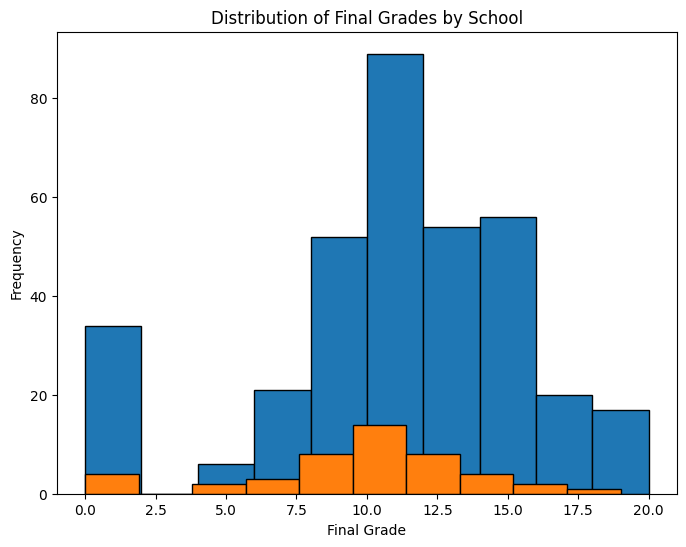

In [ ]:
# since we knwo we have two schools
GP = df[df['school']=='GP']['G3']
MS = df[df['school']=='MS']['G3']

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(GP, edgecolor='black')
ax.hist(MS, edgecolor='black')
ax.set_xlabel('Final Grade')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Final Grades by School')
plt.show()

- Average Final Grades in relation to their parents cohabitation status.

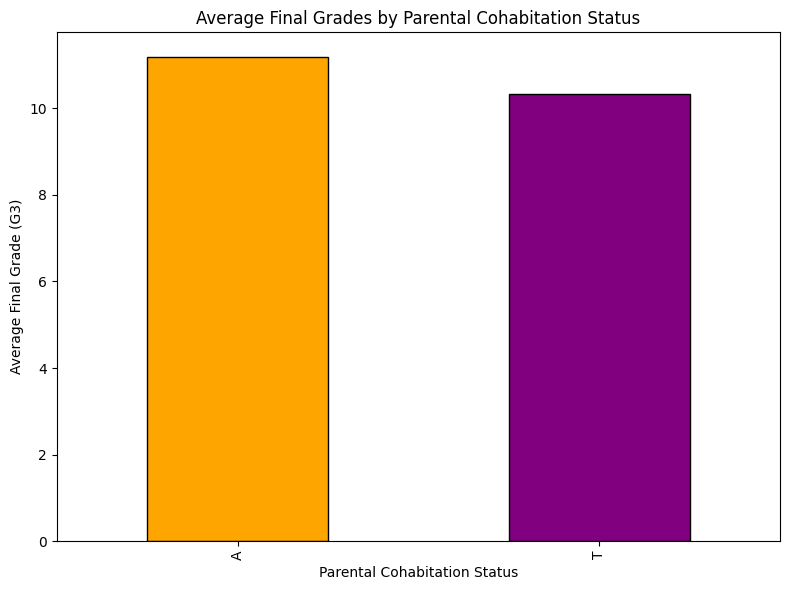

In [ ]:
avg_grades_by_pstatus = df.groupby('Pstatus')['G3'].mean()
fig, ax = plt.subplots(figsize=(8, 6))
avg_grades_by_pstatus.plot(kind='bar', ax=ax, color=['orange', 'purple'], edgecolor='black')
ax.set_xlabel('Parental Cohabitation Status')
ax.set_ylabel('Average Final Grade (G3)')
ax.set_title('Average Final Grades by Parental Cohabitation Status')
plt.tight_layout()
plt.show()

- Visualization between the relation between G3 and Family Size

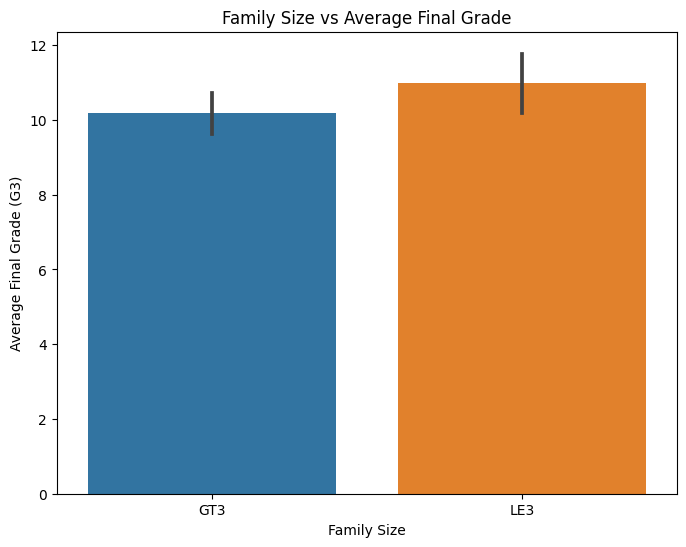

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='famsize', y='G3', data=df)
plt.xlabel('Family Size')
plt.ylabel('Average Final Grade (G3)')
plt.title('Family Size vs Average Final Grade')
plt.show()

- Relation between Father Education, Mother Education and G3


Observations on step 1:
- We have a dominant age in this dataset which is 16.
- The Absence feature is noticed to be right skewed.
- It is noticed that the G1, G2, G3 features have a normal distribution.
- The Target class has a normal distribtion, but there is outliers noticed in the visualization.
- The final grade ranges from (0-20)
- The dataset consists of almost half females and half males but it is noticed that the females slightly more than the males.
- It is noticed that the students who live in Urban are dominiant in this dataset.
- It was observed that there is no noticable relation between the student's grades and their address.
- it is noticed that the average of the females final grades if their parents are at home
- it is noticed that for both males and females the hiher averages where when their parents worked on health sector
- Females seem to have the highest grades when their parents are teachers.
- Males have the lowest when their parents are at home.
- It is observed that the Parental Cohabitation Status have affected the average grades where when they were apart they have scored higher that when they are together.

#### Step 2: Assessing data quality
This setp includes the following:
- Check for missing data.
- Check for outliers.
- Check for duplkicates.

- First let's check the missing data:

In [ ]:
df.isnull()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

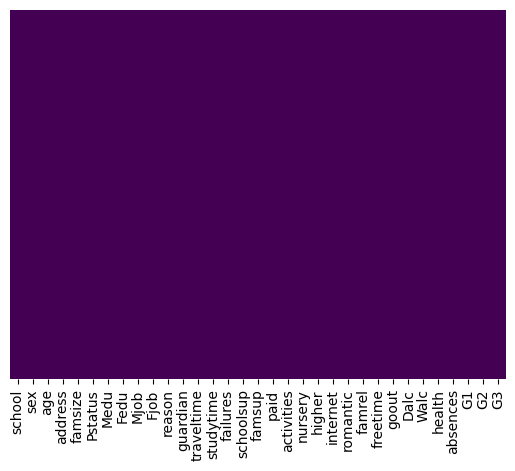

In [ ]:
# Ploting the heat map for the missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- This concludes that there is no missing data

- Let's check for Ouliers:

In [ ]:
# checking the outliers
# https://builtin.com/data-science/how-to-find-outliers-with-iqr
# Using the quartiles method IQR
for colmun in df.select_dtypes(include=['number']).columns:
    Q1 = df[colmun].quantile(0.25)
    Q3 = df[colmun].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[colmun]< lower_bound) | (df[colmun] > upper_bound)]
    print(colmun, ": ", len(outliers))

age :  1
Medu :  0
Fedu :  2
traveltime :  8
studytime :  27
failures :  83
famrel :  26
freetime :  19
goout :  0
Dalc :  18
Walc :  0
health :  0
absences :  15
G1 :  0
G2 :  13
G3 :  0


- Now let's check for duplicated values

In [ ]:
df[df.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


Observations on step 2:
- There was no missing data found.
- There was 10 colmns (numerical) that was found to have outliers values.
- There was no duplicated rows found.

#### Step 3: Data preprocessing
- Binary  & Nominal Features encoding.
- Handling outliers.
- Features Scaling.
- Features Correlation.
- Features Selection based on Correlation.
- Split to train, validation and testing

* Let's start with Binary features and nominal features encoding: the model is expected to perform better on the numerical. We can also benfit with the corr. method since it operates on numerical

In [ ]:
# One-Hot Encoding
df = pd.get_dummies(df)

In [ ]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [ ]:
df.shape

(395, 59)

- Now it's time to perform features scaling

In [ ]:
# https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
#scaler = StandardScaler()
#df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

- Now that we have handled the binary features and the nominal we can start with studying the correlation within the datset. Let's see for the whole features.

- Let's now focus with the target fetaure

In [ ]:
df.corr()['G3']

age                 -0.161579
Medu                 0.217147
Fedu                 0.152457
traveltime          -0.117142
studytime            0.097820
failures            -0.360415
famrel               0.051363
freetime             0.011307
goout               -0.132791
Dalc                -0.054660
Walc                -0.051939
health              -0.061335
absences             0.034247
G1                   0.801468
G2                   0.904868
G3                   1.000000
school_GP            0.045017
school_MS           -0.045017
sex_F               -0.103456
sex_M                0.103456
address_R           -0.105756
address_U            0.105756
famsize_GT3         -0.081407
famsize_LE3          0.081407
Pstatus_A            0.058009
Pstatus_T           -0.058009
Mjob_at_home        -0.115634
Mjob_health          0.116158
Mjob_other          -0.096477
Mjob_services        0.078429
Mjob_teacher         0.057712
Fjob_at_home        -0.013385
Fjob_health          0.057111
Fjob_other

<Axes: >

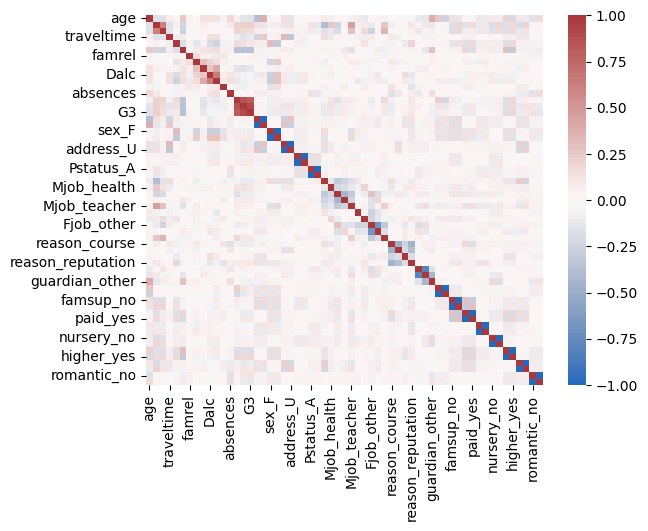

In [ ]:
figure12, axes1= plt.subplots()
sns.heatmap(df.corr(), ax=axes1, fmt='.2g',cmap= 'vlag')

- It is decided to select the features based on the correlation with the target feature and the threshold of correlation is chosen to be 0.15 reasonably.

In [ ]:
# since we are concerned with the target lets focus for the corr of the target

most_correlated = df.corr().abs()['G3'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:12]
most_correlated

G3              1.000000
G2              0.904868
G1              0.801468
failures        0.360415
Medu            0.217147
higher_yes      0.182465
higher_no       0.182465
age             0.161579
Fedu            0.152457
goout           0.132791
romantic_no     0.129970
romantic_yes    0.129970
Name: G3, dtype: float64

In [ ]:
df = df.loc[:, most_correlated.index]
df.head()

,G3,G2,G1,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no,romantic_yes
0,6,6,5,0,4,1,0,18,4,4,1,0
1,6,5,5,0,1,1,0,17,1,3,1,0
2,10,8,7,3,1,1,0,15,1,2,1,0
3,15,14,15,0,4,1,0,15,2,2,0,1
4,10,10,6,0,3,1,0,16,3,2,1,0


- For G2 and higher outliers let's viualize them to understand more.


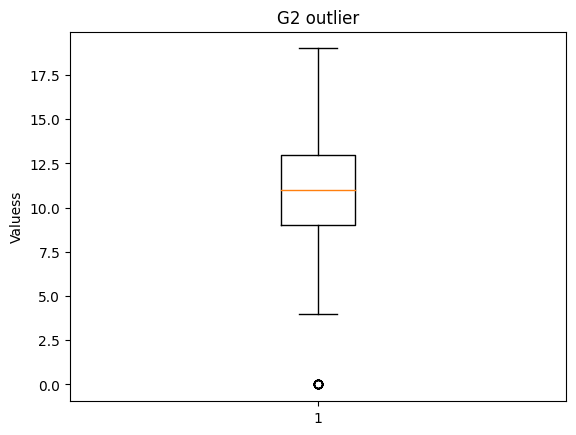

In [ ]:
plt.boxplot(df['G2'])
plt.title("G2 outlier")
plt.ylabel("Valuess")
plt.show()

- Now that the features are selected and the dataframe is preprocessed it is ready to be splitted to train and test and the splitting rule is 80:20 (Train:Test)

In [ ]:
# now let's chose the selcted of the dataframe and make it ready for the splitting
selected_features = ['age', 'Medu', 'Fedu', 'failures','higher_yes', 'G1', 'G2','romantic_no','goout']
y = df['G3']
X = df[selected_features]
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.25,random_state= 42)
print("X train:", X_train.shape)
print("X test:", X_test.shape)
print("y train", y_train.shape)
print("y test", y_test.shape)

X train: (296, 9)
X test: (99, 9)
y train (296,)
y test (99,)


In [ ]:
X.head()

,age,Medu,Fedu,failures,higher_yes,G1,G2,romantic_no,goout
0,18,4,4,0,1,5,6,1,4
1,17,1,1,0,1,5,5,1,3
2,15,1,1,3,1,7,8,1,2
3,15,4,2,0,1,15,14,0,2
4,16,3,3,0,1,6,10,1,2


In [ ]:
X.tail()

,age,Medu,Fedu,failures,higher_yes,G1,G2,romantic_no,goout
390,20,2,2,2,1,9,9,1,4
391,17,3,1,0,1,14,16,1,5
392,21,1,1,3,1,10,8,1,3
393,18,3,2,0,1,11,12,1,1
394,19,1,1,0,1,8,9,1,3


In [ ]:
y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [ ]:
y.tail()

390     9
391    16
392     7
393    10
394     9
Name: G3, dtype: int64

In [ ]:
X_test.head(20)

,age,Medu,Fedu,failures,higher_yes,G1,G2,romantic_no,goout
78,17,2,1,3,0,8,8,1,1
371,18,1,2,0,0,14,12,0,3
248,18,3,3,1,1,3,5,0,3
55,16,2,1,0,1,8,9,0,4
390,20,2,2,2,1,9,9,1,4
223,18,2,2,0,1,12,13,1,3
42,15,4,4,0,1,19,18,1,3
234,16,1,1,0,1,9,7,1,2
316,18,2,1,0,1,8,8,1,3
116,15,4,4,0,1,11,13,1,3


In [ ]:
y_test.head(20)

78     10
371    12
248     5
55     10
390     9
223    13
42     18
234     6
316     0
116    14
9      15
209     7
323    15
393    10
258    14
155     8
124     8
272    11
324    15
334     0
Name: G3, dtype: int64

Observations on step 3:
- It is noticed that there exists a high positive correlation between G1, G2, G3.
- It is noticed that G3 (final grade) had high negative correlation with failures feature.
- The corralation threshold is chosen to be 0.15 it's a reasonable choice given the diffrent corr.
- Father edu & Age outliers: It is a valid reason to have fathers with higher edu. And higher age. So no handling needed for tehse.
- It is noticed that the Grade 2 outliers all are zeros. Since these are a valid scenario in real life were students gets zero then it is decided to keep them.



#### Step 4: Modeling , Testing and Evaluation

- **First: Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error, mean_absolute_error

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_y_pred=lin_reg.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
crossl = cross_val_score(estimator = lin_reg, X = X_train, y = y_train, cv = 10,scoring="neg_mean_squared_error")
lin_rmse_scores = np.sqrt(-crossl)

In [ ]:
# print the accuracy by each measure:

print('Linear regression accuracy: ')
msel = mean_squared_error(y_test, lin_y_pred)
rmsel = mean_squared_error(y_test, lin_y_pred)**0.5
mael = mean_absolute_error(y_test, lin_y_pred)
print('Cross val     : ',lin_rmse_scores)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')
#print(lin_reg.score(X_train,y_train))
test_data_accuracy = r2_score(y_test,lin_y_pred )
print('R2 score on Test Data : ', test_data_accuracy)

Linear regression accuracy: 
Cross val     :  [2.32093575 1.59593263 1.50497496 1.63872919 2.05687884 1.34775969
 1.76192078 2.63925861 1.91381768 1.8357971 ]
MAE           :  1.2636136022920537
MSE (RMSE)    :  4.475288156791322  ( 2.1154876876955164 )
R2 score on Test Data :  0.8057419629188032


Text(0, 0.5, 'Predicted values')

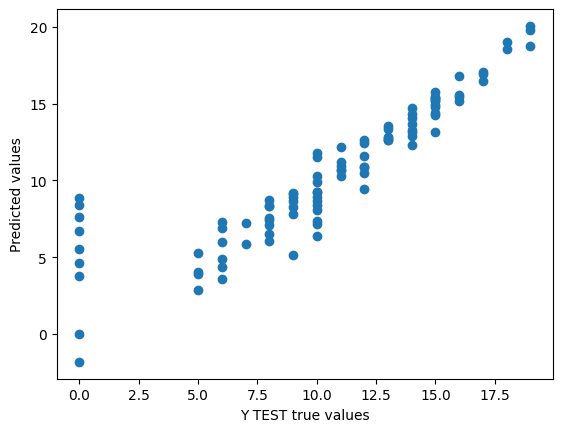

In [ ]:
plt.scatter(y_test ,lin_y_pred)
plt.xlabel('Y TEST true values')
plt.ylabel('Predicted values')

<Axes: xlabel='G3', ylabel='Density'>

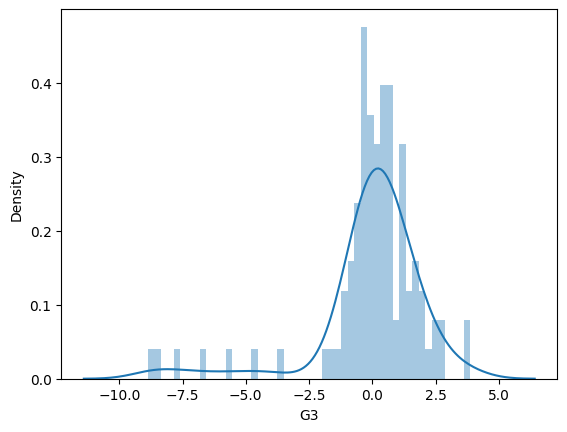

In [ ]:
sns.distplot((y_test - lin_y_pred), bins=50)

**#Let's do some testing**

In [ ]:
newData = [[18,	4,	4,	0 ,	1 ,	5 ,	6 ,	1 ,	4]]
predictionResult = lin_reg.predict(newData)
round(float(predictionResult))

5

Nice ! The true value is 6 , and our model pridected 5

In [ ]:
newData = [[15, 4,	2,	0	,1	, 15	,14,	0, 2]]
predictionResult = lin_reg.predict(newData)
round(float(predictionResult))

14

Nice ! The true value is 15 , and our model pridected 14

In [ ]:
newData = [[18,	1	,2,	0,	0,	14,	12,	0	,3]]
predictionResult = lin_reg.predict(newData)
round(float(predictionResult))

12

Bravo ! the expected value 12 and our model pridected 12

**Second: Random Forest**


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_y_pred = forest_model.predict(X_test)
print('Random Forest accuracy: ')
crossl = cross_val_score(estimator = forest_model, X = X_train, y = y_train, cv = 10,scoring="neg_mean_squared_error")
forest_rmse_scores = np.sqrt(-crossl)
msel = mean_squared_error(y_test, forest_y_pred)
rmsel = mean_squared_error(y_test, forest_y_pred)**0.5
mael = mean_absolute_error(y_test, forest_y_pred)
print('Cross val     : ',forest_rmse_scores)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')
#print(forest_model.score(X_train,y_train))
test_data_accuracy = r2_score(y_test,forest_y_pred )
print('R2 score on Test Data : ', test_data_accuracy)

Random Forest accuracy: 
Cross val     :  [2.6216744  1.13316908 1.65954411 1.6853731  2.06006293 1.55460005
 1.99848508 2.70906764 1.90642957 2.24826226]
MAE           :  1.389053872053872
MSE (RMSE)    :  5.337304745791247  ( 2.310260752770398 )
R2 score on Test Data :  0.7683245621517844


Text(0, 0.5, 'Predicted values')

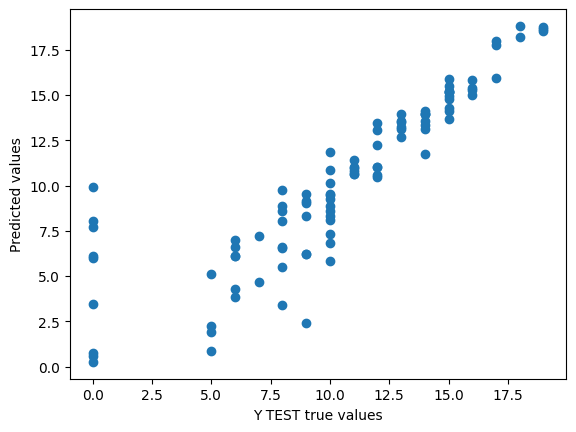

In [ ]:
plt.scatter(y_test ,forest_y_pred)
plt.xlabel('Y TEST true values')
plt.ylabel('Predicted values')

<Axes: xlabel='G3', ylabel='Density'>

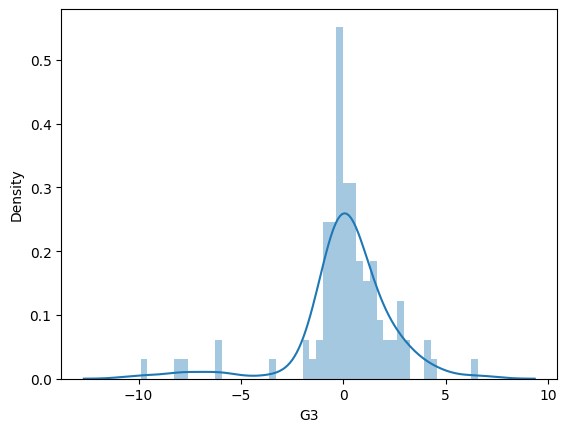

In [ ]:
sns.distplot((y_test - forest_y_pred), bins=50)

**Third:Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(X_train, y_train)
predictions = tree_reg.predict(X_test)

In [ ]:
print('Decision Tree accuracy: ')
crossl = cross_val_score(estimator = tree_reg, X = X_train, y = y_train, cv = 10,scoring="neg_mean_squared_error")
tree_rmse_scores = np.sqrt(-crossl)
msel = mean_squared_error(y_test, predictions)
rmsel = mean_squared_error(y_test, predictions)**0.5
mael = mean_absolute_error(y_test, predictions)
print('Cross val     : ',tree_rmse_scores)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')
#print(tree_reg.score(X_train,y_train))
test_data_accuracy = r2_score(y_test,predictions)
print('R2 score on Test Data : ', test_data_accuracy)

Decision Tree accuracy: 
Cross val     :  [3.60092581 2.52322545 1.65327957 2.10554823 3.55434007 2.35230384
 3.70693665 2.86627236 2.30441854 1.5974117 ]
MAE           :  1.803030303030303
MSE (RMSE)    :  9.891414141414142  ( 3.1450618660710226 )
R2 score on Test Data :  0.5706451455751703


Text(0, 0.5, 'Predicted values')

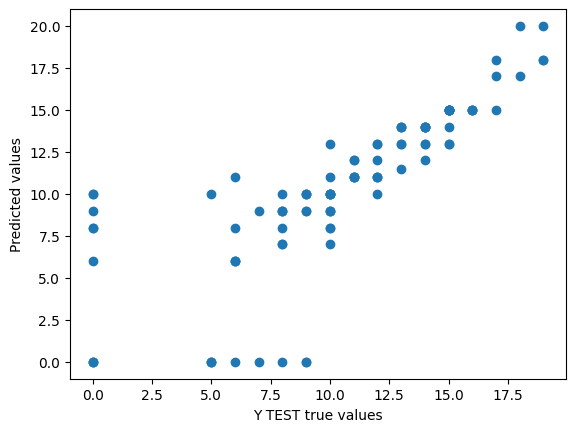

In [ ]:
plt.scatter(y_test ,predictions)
plt.xlabel('Y TEST true values')
plt.ylabel('Predicted values')

<Axes: xlabel='G3', ylabel='Density'>

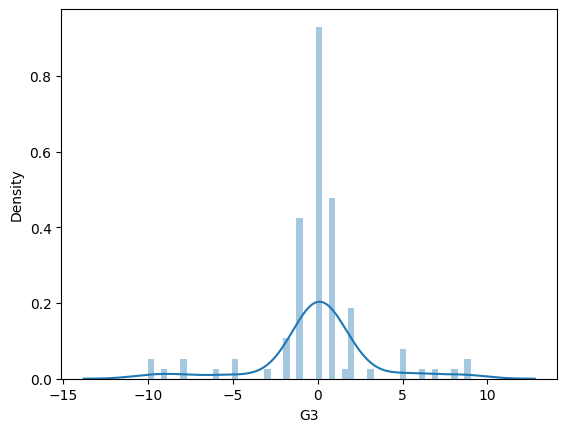

In [ ]:
sns.distplot((y_test - predictions), bins=50)

We see the best model is Linear Regression with highest R2 score & lowest MAE , RMSE

#### Step 5: Exporting the model

- save the model

In [ ]:
with open("model.pkl", "wb") as f:
    pickle.dump(lin_reg, f)